In [1]:
import numpy as np 
import pickle 


In [3]:
def unpickle(file):
    with open(file, 'rb') as f:
        data = pickle.load(f, encoding="bytes")
    return data

In [71]:
def load_cifar_10_data(data_dir, negatives=False): #흩어져있는 batches들 합친다.
    meta_data_dict = unpickle(data_dir+"/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)
    
    cifar_train_data = None 
    cifar_train_filenames = []
    cifar_train_labels = []
    
    for i in range(1,7):
        print(i)
        if i == 6:
            cifar_train_data_dict = unpickle(data_dir + "/test_batch")
        else:    
            cifar_train_data_dict = unpickle(data_dir+"/data_batch_{}".format(i))
        
        if i==1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data'])) # 아래로 합쳐
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']
    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0,2,3,1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1,4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)
    
    size = 0.3 
    territory = int(np.round(len(cifar_train_data)*size))
    print(territory)
    
    cifar_test_data = cifar_train_data[0:territory]
    cifar_test_filenames = cifar_train_filenames[0:territory]
    cifar_test_labels = cifar_train_labels[0:territory]
    cifar_train_data = cifar_train_data[territory:]
    cifar_train_filenames = cifar_train_filenames[territory:]
    cifar_train_labels = cifar_train_labels[territory:]
    
    #cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    #cifar_test_data = cifar_test_data_dict[b'data']
    #cifar_test_filenames = cifar_test_data_dict[b'filenames']
    #cifar_test_labels = cifar_test_data_dict[b'labels']

    #cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    #if negatives:
    #    cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    #else:
    #    cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
        
    #cifar_test_filenames = np.array(cifar_test_filenames)
    #cifar_test_labels = np.array(cifar_test_labels)
    
    return cifar_train_data, cifar_train_filenames, cifar_train_labels, cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names



In [86]:
from  tensorflow.python.keras.utils import np_utils 

In [10]:
import tensorflow as tf
from tensorflow import keras

In [17]:
from tensorflow.python.keras.models import Sequential

In [20]:
from tensorflow.python.keras.layers import Dense ,Activation

In [19]:
from tensorflow.python.keras.utils import np_utils

In [21]:
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten

In [41]:
import matplotlib.pyplot as plt

1
2
3
4
5
6
18000


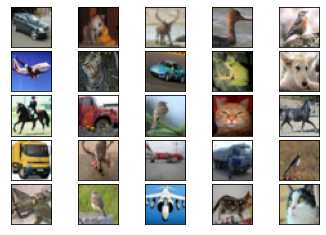

In [136]:
cifar_10_dir = 'cifar-10-batches'
train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = load_cifar_10_data(cifar_10_dir,False)
num_plot = 5
f, ax = plt.subplots(num_plot, num_plot)
for m in range(num_plot):
    for n in range(num_plot):
        idx = np.random.randint(0, train_data.shape[0])
        ax[m, n].imshow(train_data[idx])
        ax[m, n].get_xaxis().set_visible(False)
        ax[m, n].get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0.1)
f.subplots_adjust(wspace=0)
plt.show()

In [89]:
print(train_labels.shape)

(42000,)


In [73]:
print(test_data.shape)

(18000, 32, 32, 3)


In [74]:
print(train_data.shape)

(42000, 32, 32, 3)


In [75]:
print(test_data)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [76]:
print(train_filenames)

[b'car_transporter_s_000210.png' b'english_toy_spaniel_s_001036.png'
 b'bufo_bufo_s_001875.png' ... b'pekinese_s_002005.png'
 b'convertible_s_002525.png' b'broodmare_s_000763.png']


In [54]:
print(test_filenames)

[b'domestic_cat_s_000907.png' b'hydrofoil_s_000078.png'
 b'sea_boat_s_001456.png' ... b'pekinese_s_002005.png'
 b'convertible_s_002525.png' b'broodmare_s_000763.png']


In [77]:
print(train_labels)

[9 5 6 ... 5 1 7]


In [78]:
train_labels.shape

(42000,)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image

In [84]:
print(label_names)

[b'airplane' b'automobile' b'bird' b'cat' b'deer' b'dog' b'frog' b'horse'
 b'ship' b'truck']


In [91]:
#x_train , x_valid , y_train , y_valid = train_test_split(train_data, train_labels, test_size=0.3, shuffle = True)

In [139]:
#데이터 전처리 -> 0~255값으로 32*32*3 존재하므로 scaling 해준다. -> Loss scale조정을 위해 
x_train = train_data.astype('float32') / 255.0
#x_train = x_train.astype('float32') / 255.0
#x_valid = x_valid.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
y_train = np_utils.to_categorical(train_labels,10)
#y_valid = np_utils.to_categorical(y_valid)
y_test = np_utils.to_categorical(test_labels,10)
print('y_train :',np.shape(y_train))


y_train : (42000, 10)


In [109]:
batchsize = 512
num_class = 10
epoch = 50 
lr = 0.01 
# decay = 0.95
channel = 3 
row = 32 
col = 32 

In [135]:
x_train

array([[[[5.24685083e-06, 6.45302362e-06, 1.16395659e-05],
         [5.24685083e-06, 6.45302362e-06, 1.15792573e-05],
         [5.36746802e-06, 6.57364080e-06, 1.16998744e-05],
         ...,
         [5.48808521e-06, 6.39271457e-06, 1.17601830e-05],
         [5.36746802e-06, 6.33240597e-06, 1.15189487e-05],
         [5.18654224e-06, 6.27209738e-06, 1.13380220e-05]],

        [[5.54839380e-06, 6.75456658e-06, 1.20617260e-05],
         [5.54839380e-06, 6.75456658e-06, 1.20014174e-05],
         [5.66901099e-06, 6.87518377e-06, 1.21220346e-05],
         ...,
         [6.03086301e-06, 6.69425799e-06, 1.16395659e-05],
         [5.72931958e-06, 6.69425799e-06, 1.16998744e-05],
         [5.48808521e-06, 6.63394940e-06, 1.17601830e-05]],

        [[5.78962863e-06, 6.99580096e-06, 1.22426518e-05],
         [5.78962863e-06, 6.99580096e-06, 1.21823432e-05],
         [5.91024582e-06, 7.11641860e-06, 1.23029604e-05],
         ...,
         [6.69425799e-06, 6.99580096e-06, 1.12174048e-05],
         [

In [95]:
x_train.shape

(29400, 32, 32, 3)

In [149]:
def seq_model(learning_rate, train=True):
    input_size = (32,32,3)
    img_input = tf.keras.layers.Input(shape= input_size) #filters = 뽑아낼 특징들을 각각 한 개씩 갖고 있는 filter의 개수를 지정 
    input_layer = tf.keras.layers.Conv2D( kernel_size=(3,3), strides = (2,2), filters=16, activation='relu')(img_input)
    first_pooling_layer = tf.keras.layers.MaxPooling2D((2,2))(input_layer)
    middle_layer = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu')(first_pooling_layer)
    second_pooling_layer = tf.keras.layers.MaxPooling2D((2,2))(middle_layer)
    last_layer = tf.keras.layers.Conv2D(kernel_size=(3,3), padding='same',filters=64, activation='relu')(second_pooling_layer)
    h = tf.keras.layers.Flatten()(last_layer)
    h = tf.keras.layers.Dense(32, activation='relu')(h)
    predictions = tf.keras.layers.Dense(10, activation='softmax')(h)
    
    model = tf.keras.Model(inputs=img_input, outputs=predictions)
    
    model.summary()

    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,epochs=5)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    #mape = mean_absolute_percentage_error(y_test, y_pred)
    
    return test_loss

In [144]:
from bayes_opt import BayesianOptimization

pbounds = {
    'learning_rate':(0.01, 0.2)
}

bo = BayesianOptimization(f=seq_model, pbounds=pbounds, verbose=2, random_state=1)
#나오는 결과값의 target= 목적함수의 값, 나머지는 pbounds의 최적의 값이다. 
bo.maximize(init_points=2, n_iter=10, acq='ei', xi=0.01)

print(bo.max)

|   iter    |  target   | learni... |
-------------------------------------
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 15, 15, 16)        448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 5, 5, 32)          4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 2, 2, 64)          18496     
________________________________________________

42000/42000 [==============================] - 13s 306us/sample - loss: 1.8278 - accuracy: 0.3220
Epoch 2/5
42000/42000 [==============================] - 12s 292us/sample - loss: 1.5110 - accuracy: 0.4510
Epoch 3/5
42000/42000 [==============================] - 12s 288us/sample - loss: 1.4028 - accuracy: 0.4937
Epoch 4/5
42000/42000 [==============================] - 12s 279us/sample - loss: 1.3346 - accuracy: 0.5219
Epoch 5/5
42000/42000 [==============================] - 15s 356us/sample - loss: 1.2851 - accuracy: 0.5416
|  4        |  1.289    |  0.08926  |
Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 15, 15, 16)        448       
_________________________________________________________________
max_pooling2d_41 (

Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 13s 298us/sample - loss: 1.7526 - accuracy: 0.3518
Epoch 2/5
42000/42000 [==============================] - 12s 290us/sample - loss: 1.4591 - accuracy: 0.4714
Epoch 3/5
42000/42000 [==============================] - 11s 252us/sample - loss: 1.3505 - accuracy: 0.5164
Epoch 4/5
42000/42000 [==============================] - 12s 295us/sample - loss: 1.2869 - accuracy: 0.5416
Epoch 5/5
42000/42000 [==============================] - 11s 266us/sample - loss: 1.2339 - accuracy: 0.5627
|  8        |  1.284    |  0.08922  |
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 15, 15, 16)        448       
___________________________________________________

Train on 42000 samples
Epoch 1/5
42000/42000 [==============================] - 12s 289us/sample - loss: 1.7797 - accuracy: 0.3380
Epoch 2/5
42000/42000 [==============================] - 12s 274us/sample - loss: 1.5067 - accuracy: 0.4530
Epoch 3/5
42000/42000 [==============================] - 11s 253us/sample - loss: 1.3849 - accuracy: 0.5073
Epoch 4/5
42000/42000 [==============================] - 13s 311us/sample - loss: 1.3033 - accuracy: 0.5349
Epoch 5/5
42000/42000 [==============================] - 11s 251us/sample - loss: 1.2439 - accuracy: 0.5593
|  12       |  1.254    |  0.0339   |
{'target': 1.3196681155098808, 'params': {'learning_rate': 0.08924945944030302}}


In [142]:
print(y_train.shape)
print(y_train)

(42000, 10)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
